# **Carregamento da base de dados e declaração das bibliotecas usadas**

In [1]:
pip install xlrd


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [3]:
path = r'/Users/fabicampanari/Desktop/_credit_card_default_prediction_project/default of credit card clients.xls' # Caminho do arquivo
defaults = pd.read_excel(path, engine = "xlrd") # Leitura da base de dados


In [4]:
defaults.columns = [col for col in defaults.iloc[0, :]] # Renomeando as colunas
defaults.drop(columns = ["ID", "SEX"], axis = 1, inplace = True) # Removendo a coluna ID
defaults.drop(index = 0, axis = 0, inplace = True) # Removendo a primeira linha que continha os nomes das colunas
defaults.index = list(range(30000)) # Reindexando o dataframe

for x in defaults.columns: defaults[x] = defaults[x].apply(lambda x: int(x))

A base de dados terá duas colunas removidas: a coluna **ID**, que serve apenas como identificador do usuário, e a coluna **SEX**. A remoção da coluna **SEX** se justifica por razões éticas, já que o gênero não deve ser utilizado como critério para determinar o direito de um cliente ao crédito.

In [5]:
defaults["EDUCATION"] = defaults["EDUCATION"].apply(lambda x: 5 if x == 6 or x == 0 else x)
defaults["MARRIAGE"] = defaults["MARRIAGE"].apply(lambda x: 3 if x == 0 else x)

Os valores de Educação variam de 0 a 6, entretanto, os valores 0, 5 e 6 representam o mesmo nível de educação. Por causa disso, ambos podem ser juntados como uma única informação. Também, os valores 0, são os mesmo dados de 3, onde não há conhecimento do estado civil da base de dados.

In [6]:
defaults

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,34,0,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,1,37,0,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,2,1,57,-1,0,-1,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,3,1,39,0,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,3,2,43,-1,-1,-1,-1,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,2,2,37,4,3,2,-1,0,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,3,1,41,1,-1,0,0,0,-1,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# **Informações da Base de Dados**

- `LIMIT_BAL`: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- `EDUCATION`:
  - `graduate school` = 1
  - `university` = 2
  - `high school` = 3
  - `others` = 4
  - `unknown` = 5
- `MARRIAGE`:
  - `married` = 1
  - `single` = 2
  - `others` = 3
- `AGE`: Age in years
<br><br>
- `PAY_0`: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- `PAY_2`: Repayment status in August, 2005 (scale same as above)
- `PAY_3`: Repayment status in July, 2005 (scale same as above)
- `PAY_4`: Repayment status in June, 2005 (scale same as above)
- `PAY_5`: Repayment status in May, 2005 (scale same as above)
- `PAY_6`: Repayment status in April, 2005 (scale same as above)
<br><br>
- `BILL_AMT1`: Amount of bill statement in September, 2005 (NT dollar)
- `BILL_AMT2`: Amount of bill statement in August, 2005 (NT dollar)
- `BILL_AMT3`: Amount of bill statement in July, 2005 (NT dollar)
- `BILL_AMT4`: Amount of bill statement in June, 2005 (NT dollar)
- `BILL_AMT5`: Amount of bill statement in May, 2005 (NT dollar)
- `BILL_AMT6`: Amount of bill statement in April, 2005 (NT dollar)
<br><br>
- `PAY_AMT1`: Amount of previous payment in September, 2005 (NT dollar)
- `PAY_AMT2`: Amount of previous payment in August, 2005 (NT dollar)
- `PAY_AMT3`: Amount of previous payment in July, 2005 (NT dollar)
- `PAY_AMT4`: Amount of previous payment in June, 2005 (NT dollar)
- `PAY_AMT5`: Amount of previous payment in May, 2005 (NT dollar)
- `PAY_AMT6`: Amount of previous payment in April, 2005 (NT dollar)
<br><br>
- `default payment next month`: Default payment (1=yes, 0=no)

# **Estudo da Dase de Bados**

In [7]:
def proportion(database):
    index = sorted(list(set(database.iloc[:, 0])))
    columns = list(database.columns)
    adimplentes = database[database["default payment next month"] == 0]
    inadimplentes = database[database["default payment next month"] == 1]
    dataframe = pd.DataFrame(columns=["Adimplentes", "Inadimplentes"])

    for x in range(len(index)):
        total = len(database[database[columns[0]] == index[x]])
        adimplentes_count = len(adimplentes[adimplentes[columns[0]] == index[x]])
        inadimplentes_count = len(inadimplentes[inadimplentes[columns[0]] == index[x]])

        dataframe.loc[x] = {
            "Adimplentes": adimplentes_count / total,
            "Inadimplentes": inadimplentes_count / total
        }

    dataframe.index = index

    return dataframe

In [8]:
lista = []

## Educação

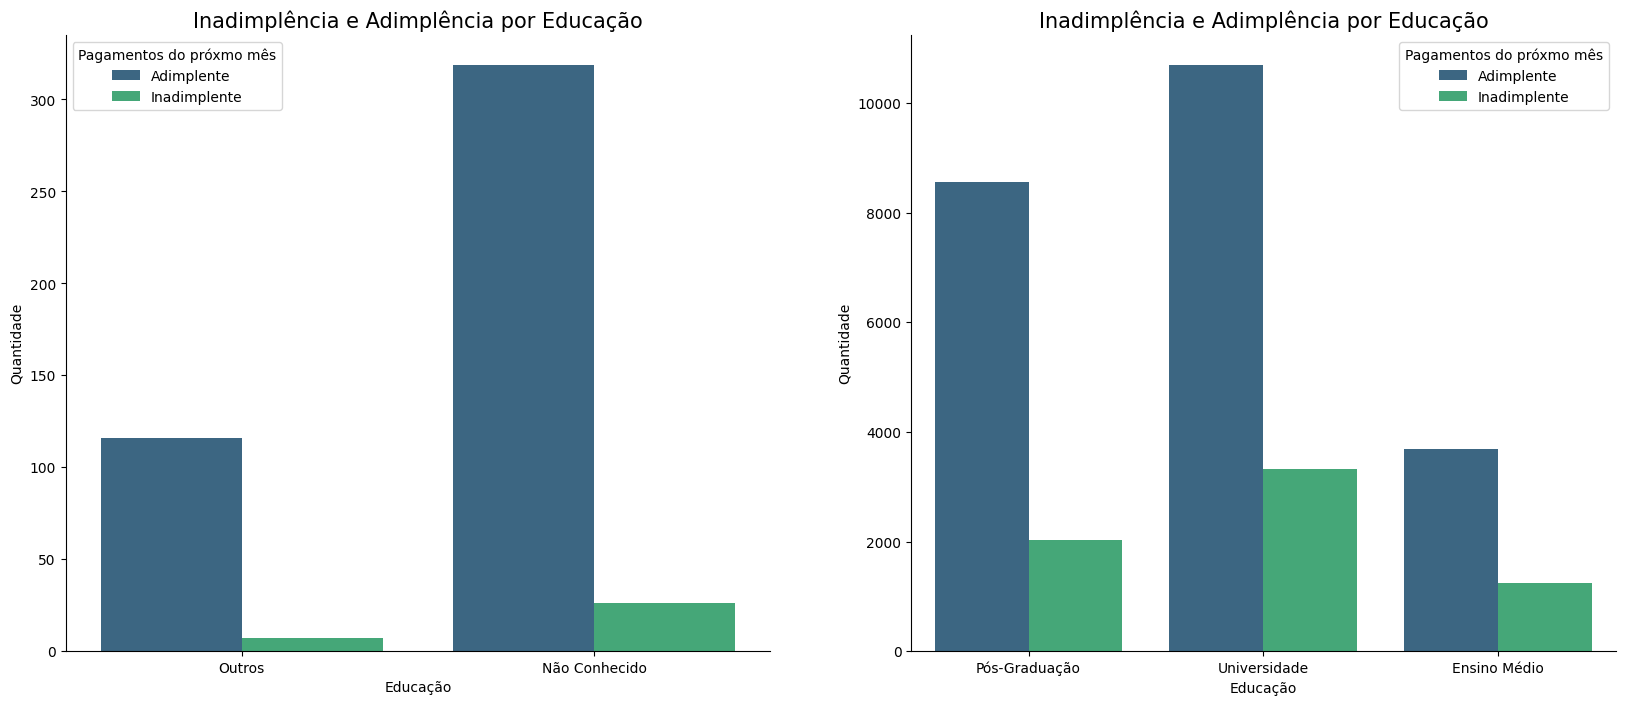

In [9]:
defaults_1 = defaults[~defaults["EDUCATION"].isin(range(1, 4))] # Filtrando os valores de EDUCATION que não estão entre 1 e 3
defaults_2 = defaults[~defaults["EDUCATION"].isin([0, 4, 5, 6])] # Filtrando os valores de EDUCATION que não estão entre 0, 4, 5 e 6

fig, (left, right) = plt.subplots(1, 2, figsize = (20, 8)) # Criando subplots e ajustando seu tamanho

# Lado direito
sns.countplot(data = defaults_2, x = "EDUCATION", hue = "default payment next month", palette = "viridis", ax = right) # Gráfico de barras

right.set_title("Inadimplência e Adimplência por Educação", fontdict = {"fontsize": 15}) # Adicionando título
right.set_xlabel("Educação") # Adicionando label no eixo x
right.set_ylabel("Quantidade") # Adicionando label no eixo y
right.legend(title = "Pagamentos do próxmo mês", labels = ["Adimplente", "Inadimplente"]) # Adicionando legenda

right.spines["right"].set_visible(False) # Removendo a linha direita
right.spines["top"].set_visible(False) # Removendo a linha superior
right.set_xticks([0, 1, 2])
right.set_xticklabels(["Pós-Graduação", "Universidade", "Ensino Médio"])

# Lado esquerdo
sns.countplot(data = defaults_1, x = "EDUCATION", hue = "default payment next month", palette = "viridis", ax = left) # Gráfico de barras

left.set_title("Inadimplência e Adimplência por Educação", fontdict = {"fontsize": 15}) # Adicionando título
left.set_xlabel("Educação") # Adicionando label no eixo x
left.set_ylabel("Quantidade") # Adicionando label no eixo y
left.legend(title = "Pagamentos do próxmo mês", labels = ["Adimplente", "Inadimplente"]) # Adicionando legenda

left.spines["right"].set_visible(False) # Removendo a linha direita
left.spines["top"].set_visible(False) # Removendo a linha superior
left.set_xticks([0, 1])
left.set_xticklabels(["Outros", "Não Conhecido"])

plt.show() # Removendo lixo de output

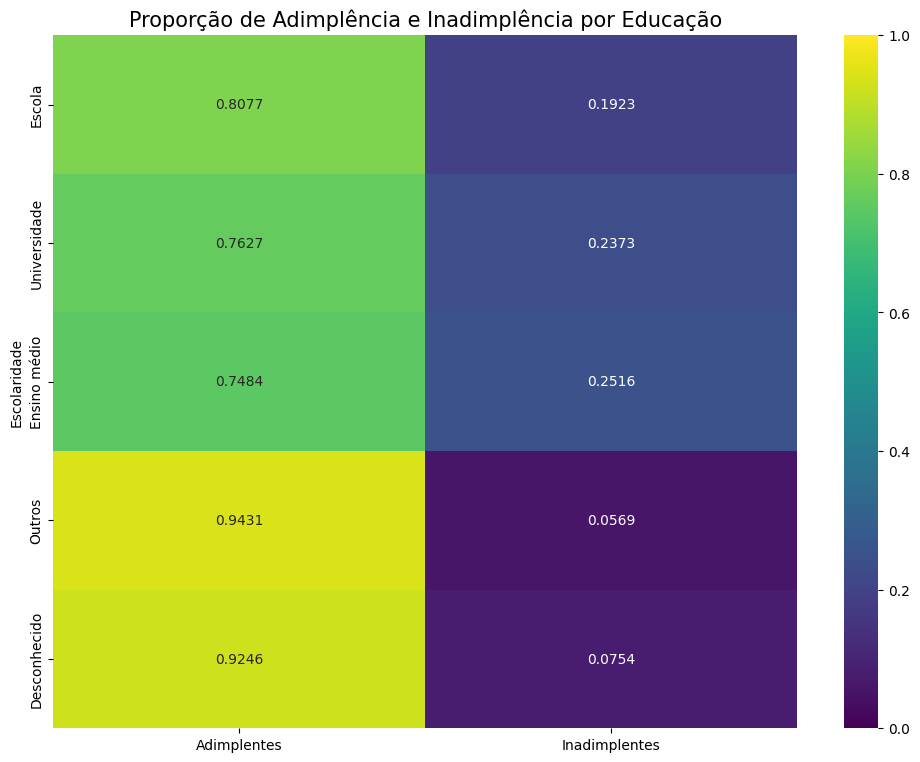

In [11]:
aux = proportion(defaults[["EDUCATION", "default payment next month"]])
aux.index = ["Escola", "Universidade", "Ensino médio", "Outros", "Desconhecido"]

plt.figure(figsize=(12, 9))
sns.heatmap(aux, vmin=0.0, vmax = 1.0, annot = True, cmap = "viridis", fmt = ".4f")

plt.title("Proporção de Adimplência e Inadimplência por Educação", fontdict = {"fontsize": 15})
plt.ylabel("Escolaridade")

plt.show()

Com base no Heatmap e no histograma, podemos concluir que pessoas que estão cursando pós-graduação, ensino médio ou faculdade têm maior probabilidade de se tornarem inadimplentes em comparação àquelas com outros níveis de escolaridade ou escolaridade desconhecida. Por causa dessa  análise, podemos inferir que a escolaridade pode ser uma das features para o modelo de Regressão logística.

## Estado Social

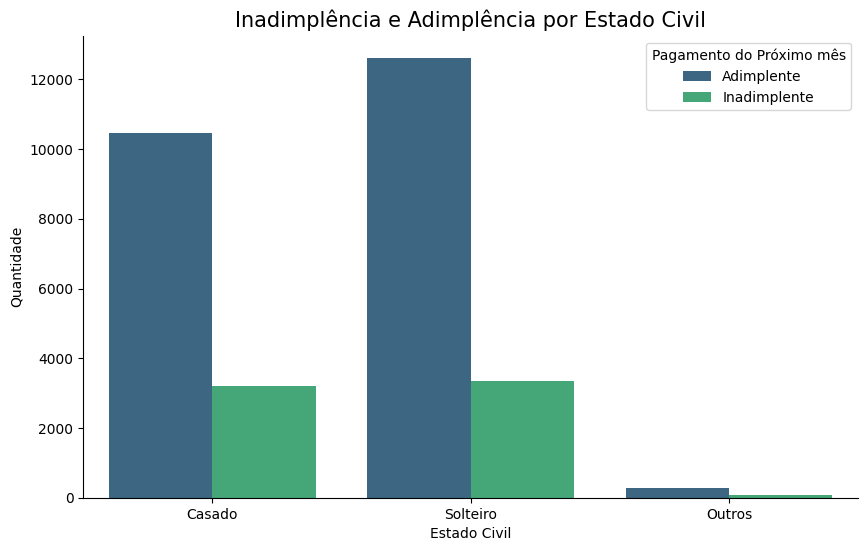

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=defaults, x="MARRIAGE", hue="default payment next month", palette="viridis")

# Set custom x-axis labels
plt.xticks(ticks=[0, 1, 2], labels=["Casado", "Solteiro", "Outros"])
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

# Add title and labels
plt.title("Inadimplência e Adimplência por Estado Civil", fontsize=15)
plt.xlabel("Estado Civil")
plt.ylabel("Quantidade")
plt.legend(title="Pagamento do Próximo mês", labels=["Adimplente", "Inadimplente"])

# Show the plot
plt.show()

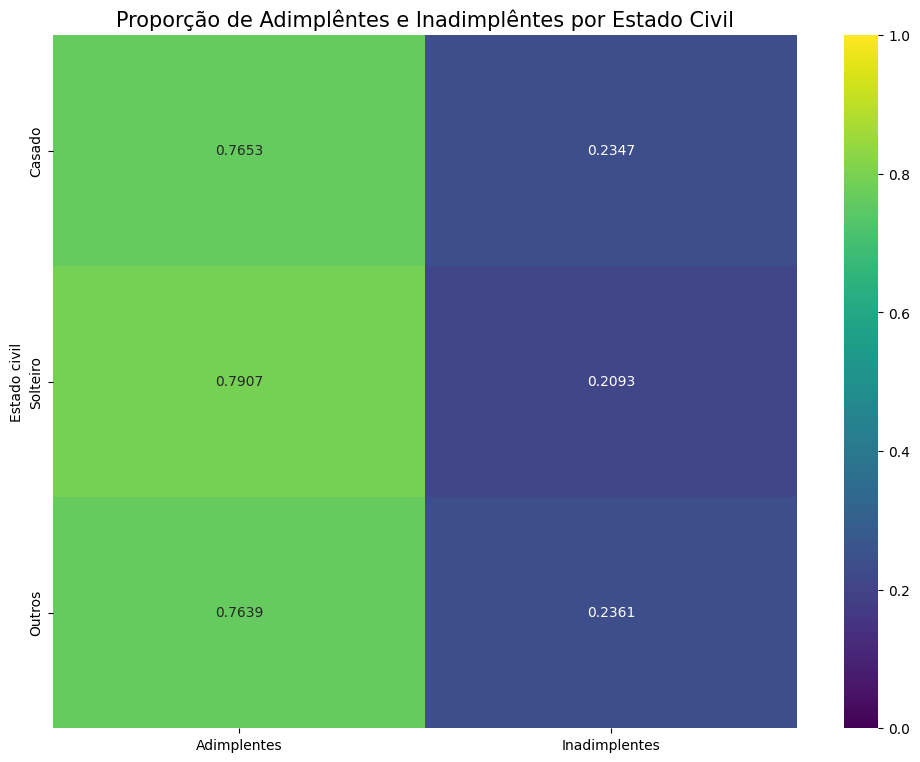

In [13]:
aux = proportion(defaults[["MARRIAGE", "default payment next month"]])
aux.index = ["Casado", "Solteiro", "Outros"]

plt.figure(figsize=(12, 9))
sns.heatmap(aux, vmin=0.0, vmax = 1.0, annot = True, cmap = "viridis", fmt = ".4f")

plt.title("Proporção de Adimplêntes e Inadimplêntes por Estado Civil", fontdict = {"fontsize": 15})
plt.ylabel("Estado civil")

plt.show()

Com base no histograma e no heatmap acima, podemos observar que a proporção de inadimplentes entre os diferentes estados civis não varia significativamente. A diferença percentual entre os clientes classificados como "outros" e "casados" é inferior a 1%, e ambos diferem em cerca de 3% em relação aos clientes "solteiros". Isso indica que o estado civil, como uma variável isolada, tem pouco impacto sobre a inadimplência e, portanto, não contribui significativamente para melhorar a precisão dos modelos preditivos. A inclusão dessa feature provavelmente não resultará em um aumento considerável na capacidade do modelo de prever inadimplência.

## Idade

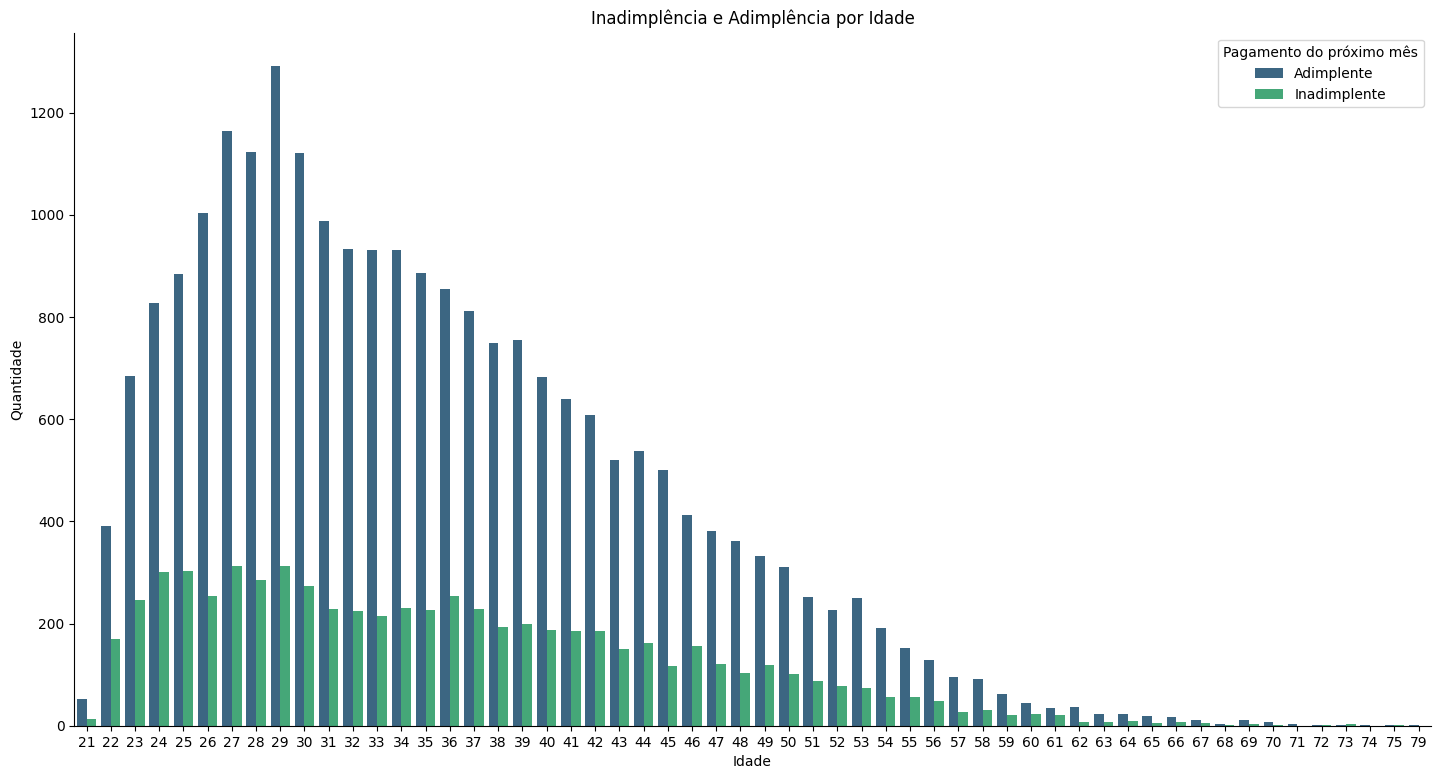

In [14]:
plt.figure(figsize = (17.5, 9)) # Aleterando dimensionalidade do gráfico

sns.countplot(data = defaults, x = "AGE", hue = "default payment next month", palette = "viridis") # Gráfico de barras

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.title("Inadimplência e Adimplência por Idade")
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.legend(title = "Pagamento do próximo mês", labels = ["Adimplente", "Inadimplente"])

plt.show()

Com base no gráfico acima, podemos observar que o número de pessoas adimplentes diminui mais significativamente com o aumento da idade em comparação com o número de inadimplentes. Isso sugere que, quanto maior a idade do cliente, maior a probabilidade de ele se tornar inadimplente no banco.

Essa informação é valiosa, pois tornar-se uma **feature importante** para o banco na tomada de decisões na criação do modelo preditivo.

## Limite de Crédito

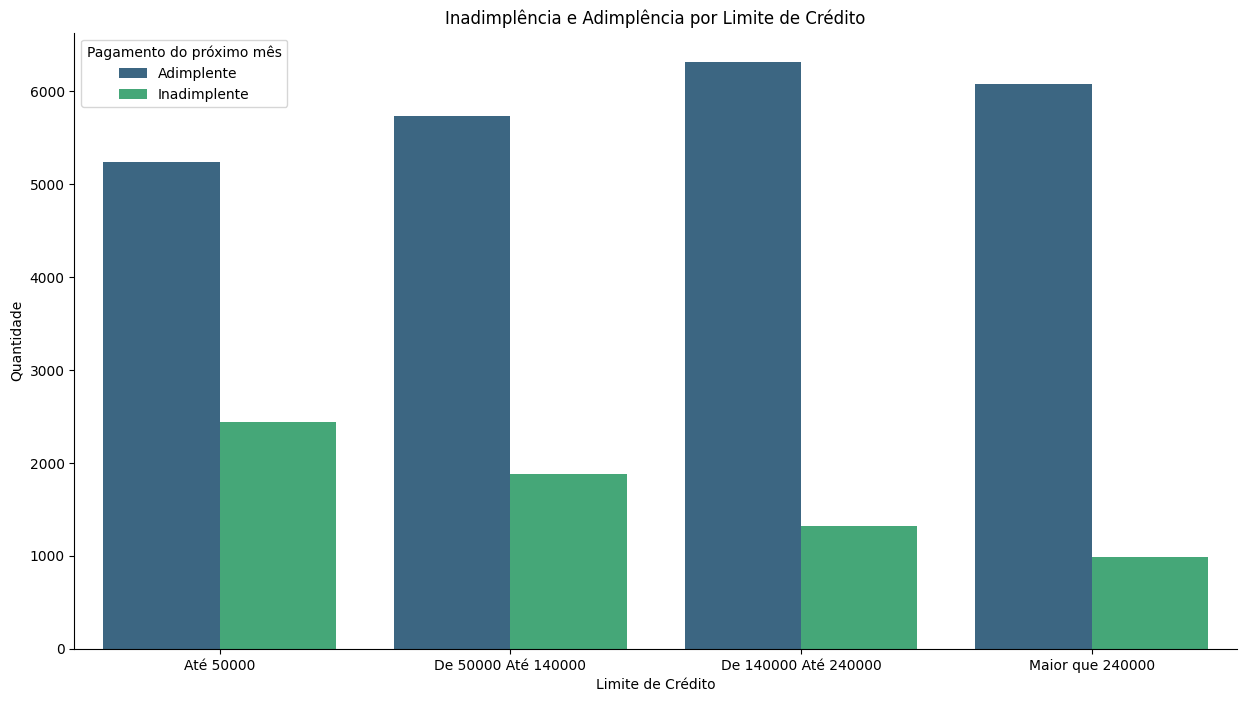

In [15]:
aux = defaults.copy() # Copiando a base de dados
aux['LIMIT_BAL_quantile'] = pd.qcut(defaults['LIMIT_BAL'], q=4, labels=["Até 50000", "De 50000 Até 140000",
                                                                        "De 140000 Até 240000", "Maior que 240000"]) # Dividindo a base de dados em quantiles

plt.figure(figsize = (15, 8)) # Aleterando dimensionalidade do gráfico
sns.countplot(data = aux, x = "LIMIT_BAL_quantile", hue = "default payment next month", palette = "viridis") # Gráfico de barras

plt.legend(title = "Pagamento do próximo mês", labels = ["Adimplente", "Inadimplente"]) # Adicionando legenda
plt.ylabel("Quantidade")
plt.xlabel("Limite de Crédito", )
plt.title("Inadimplência e Adimplência por Limite de Crédito")

plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.show()

O gráfico acima revela uma tendência clara: quanto maior o limite de crédito do cliente, menor a probabilidade de inadimplência. Os clientes com limites de crédito mais baixos (até 50.000) apresentam uma proporção maior de inadimplentes em comparação aos clientes com limites mais altos. Essa informação é extremamente relevante para a tomada de decisões no banco, pois pode ser usada para prever o risco de inadimplência com base no limite de crédito oferecido. Ao identificar que clientes com limites menores têm maior chance de inadimplência, o banco pode ajustar suas estratégias de concessão de crédito e mitigação de risco, prevenindo potenciais perdas financeiras.

## Status de Pagamento

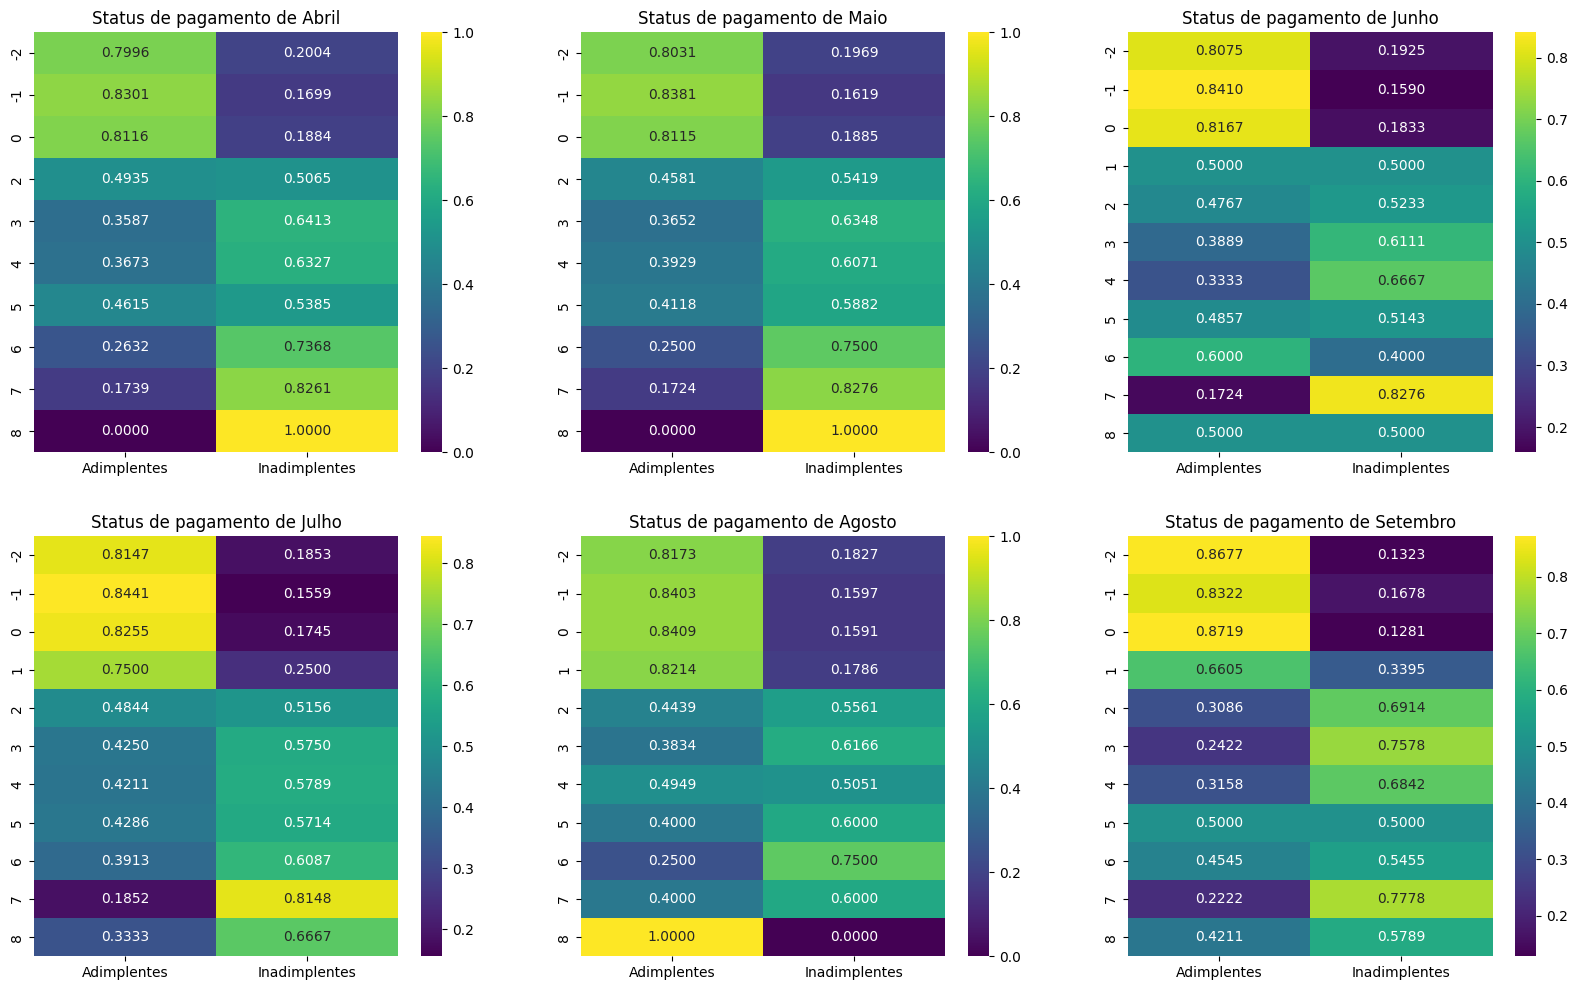

In [16]:
fig, axes= plt.subplots(2, 3, figsize = (20, 12)) # Criando subplots e ajustando seu tamanho
(upper_left, up, upper_right), (lower_left, down, lower_right) = axes # Separando os subplots em linhas
grafico = [upper_left, up, upper_right, lower_left, down, lower_right] # Lista com os subplots
grafico.reverse()

coluna = list(range(0, 7)) # criando uma lista para indicar qual PAY usar
coluna.remove(1) # Removendo o que seria o possível PAY_1, porém tal não existe

meses = ["Setembro", "Agosto", "Julho", "Junho", "Maio", "Abril"]
legenda = [-2, 'E dia', 0, 'Atraso de 1 dia', 'Atraso de 2 dia', 'Atraso de 3 dia', 'Atraso de 4 dia', 'Atraso de 5 dia', 'Atraso de 6 dia', 'Atraso de 7 dia', 'Atraso de 8 dia']

for x in range(len(grafico)):
    sns.heatmap(data = proportion(defaults[[f"PAY_{coluna[x]}", "default payment next month"]]), annot = True, cmap = "viridis", fmt = ".4f", ax = grafico[x]) # Heatmap

    grafico[x].set_title("Status de pagamento de " + meses[x]) # Adicionando título

**`Informação`**: -1 = em dia , 1 = atrasado por 1 mês, 2 = atrasado por 2 mês, … 8 = atrasado por 8 mês

Com base no heatmap acima, é evidente que, independentemente do mês considerado, a taxa de inadimplência é sempre superior à taxa de adimplência a partir do segundo mês de atraso nos pagamentos. Nos níveis mais altos de atraso, como 7 ou mais meses, a probabilidade de inadimplência, em alguns meses, praticamente atinge 100%, o que é uma informação extremamente valiosa para a análise de risco de crédito. Isso sugere que, quando um cliente começa a acumular atrasos a partir de dois meses, ele se torna significativamente mais propenso a se tornar inadimplente. Portanto, essa variável de atraso no pagamento é crucial para prever a probabilidade de inadimplência de um cliente e pode ser determinante em modelos de crédito e decisões de gestão de risco.

## Valor da Fatura

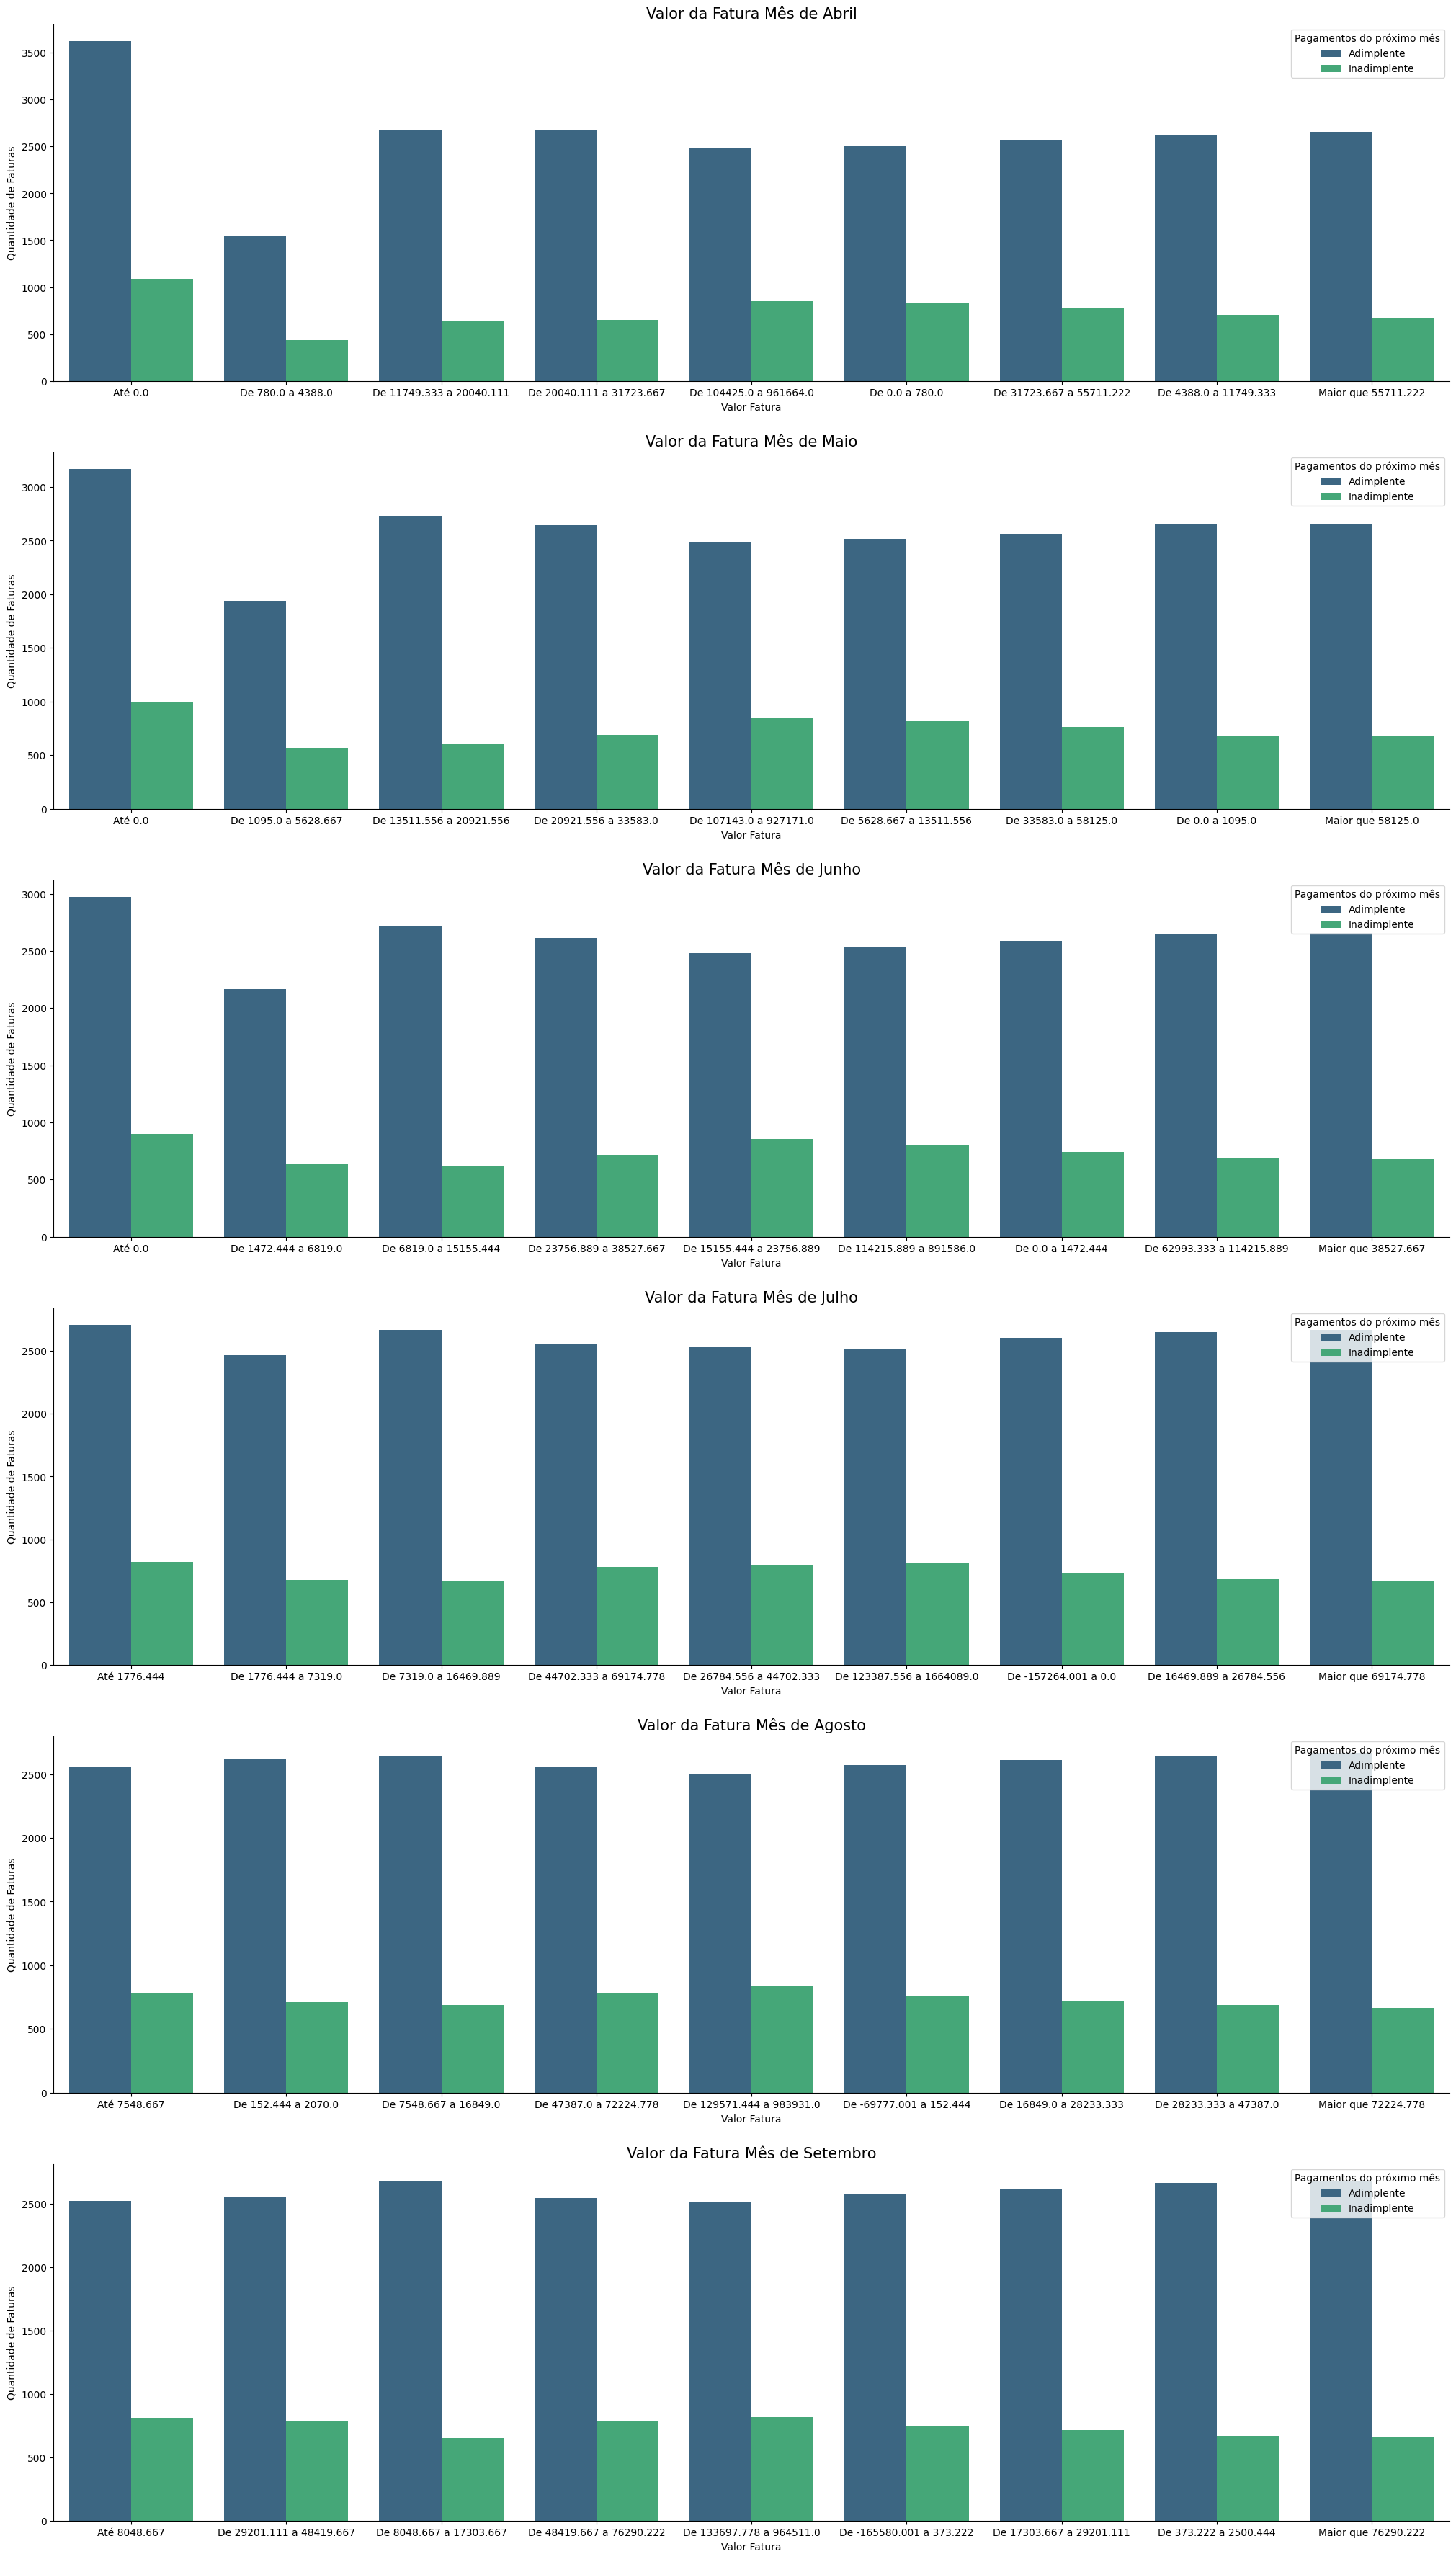

In [17]:
fig, axis = plt.subplots(6, 1, figsize = (25, 45)) # Criando subplots e ajustando seu tamanho

fist, second, third, fourth, fifth, sixth = axis # Separando os subplots em linhas
rows = [sixth, fifth, fourth, third, second, fist] # Invertendo a ordem dos subplots
meses = ["Setembro", "Agosto", "Julho", "Junho", "Maio", "Abril"]

for x in range(len(rows)):
    aux = defaults.copy() # Copiando a base de dados
    aux[f"BILL_AMT{x + 1}_quantiles"] = pd.qcut(defaults[f"BILL_AMT{x + 1}"], q = 9)

    sns.countplot(data = aux, x = f"BILL_AMT{x + 1}_quantiles", hue = "default payment next month", palette = "viridis", ax = rows[x]) # Gráfico de barras
    rows[x].spines["top"].set_visible(False)
    rows[x].spines["right"].set_visible(False)
    rows[x].set_title(f"Valor da Fatura Mês de {meses[x]}", fontdict = {"fontsize": 15}) # Adicionando título
    rows[x].set_xlabel("Valor Fatura") # Adicionando label no eixo x
    rows[x].set_ylabel("Quantidade de Faturas") # Adicionando label no eixo y
    rows[x].legend(title = "Pagamentos do próximo mês", labels = ["Adimplente", "Inadimplente"], loc = "upper right") # Adicionando legenda

    aux = aux[f"BILL_AMT{x + 1}_quantiles"].unique()
    axis_x = []
    for y in range(len(aux)):
        if y == 0:
            axis_x.append(f"Até {float(aux[y].right)}")

        elif y == 8:
            axis_x.append(f"Maior que {float(aux[y].left)}")

        else:
            axis_x.append(f"De {float(aux[y].left)} a {float(aux[y].right)}")

    rows[x].set_xticks(list(range(9)))
    rows[x].set_xticklabels(axis_x)



Com base nos gráficos apresentados, podemos observar que as variáveis **BILL_AMT1** a **BILL_AMT6** (valores de fatura dos meses de abril a setembro) apresentam uma diferença proporcional relativamente sutil entre adimplentes e inadimplentes. Essas diferenças, embora perceptíveis, são pequenas em cada um dos gráficos, o que indica que essas variáveis podem ser usadas como **features** para a base de dados.

No entanto, devido à pequena variação nas proporções, essas variáveis provavelmente não terão peso significativo o suficiente para serem **decisivas** na previsão de inadimplência. Elas podem ser úteis quando combinadas com outras variáveis no modelo preditivo, mas, isoladamente, não parecem capazes de fornecer uma discriminação clara entre clientes adimplentes e inadimplentes.

## Pagamentos Anteriores

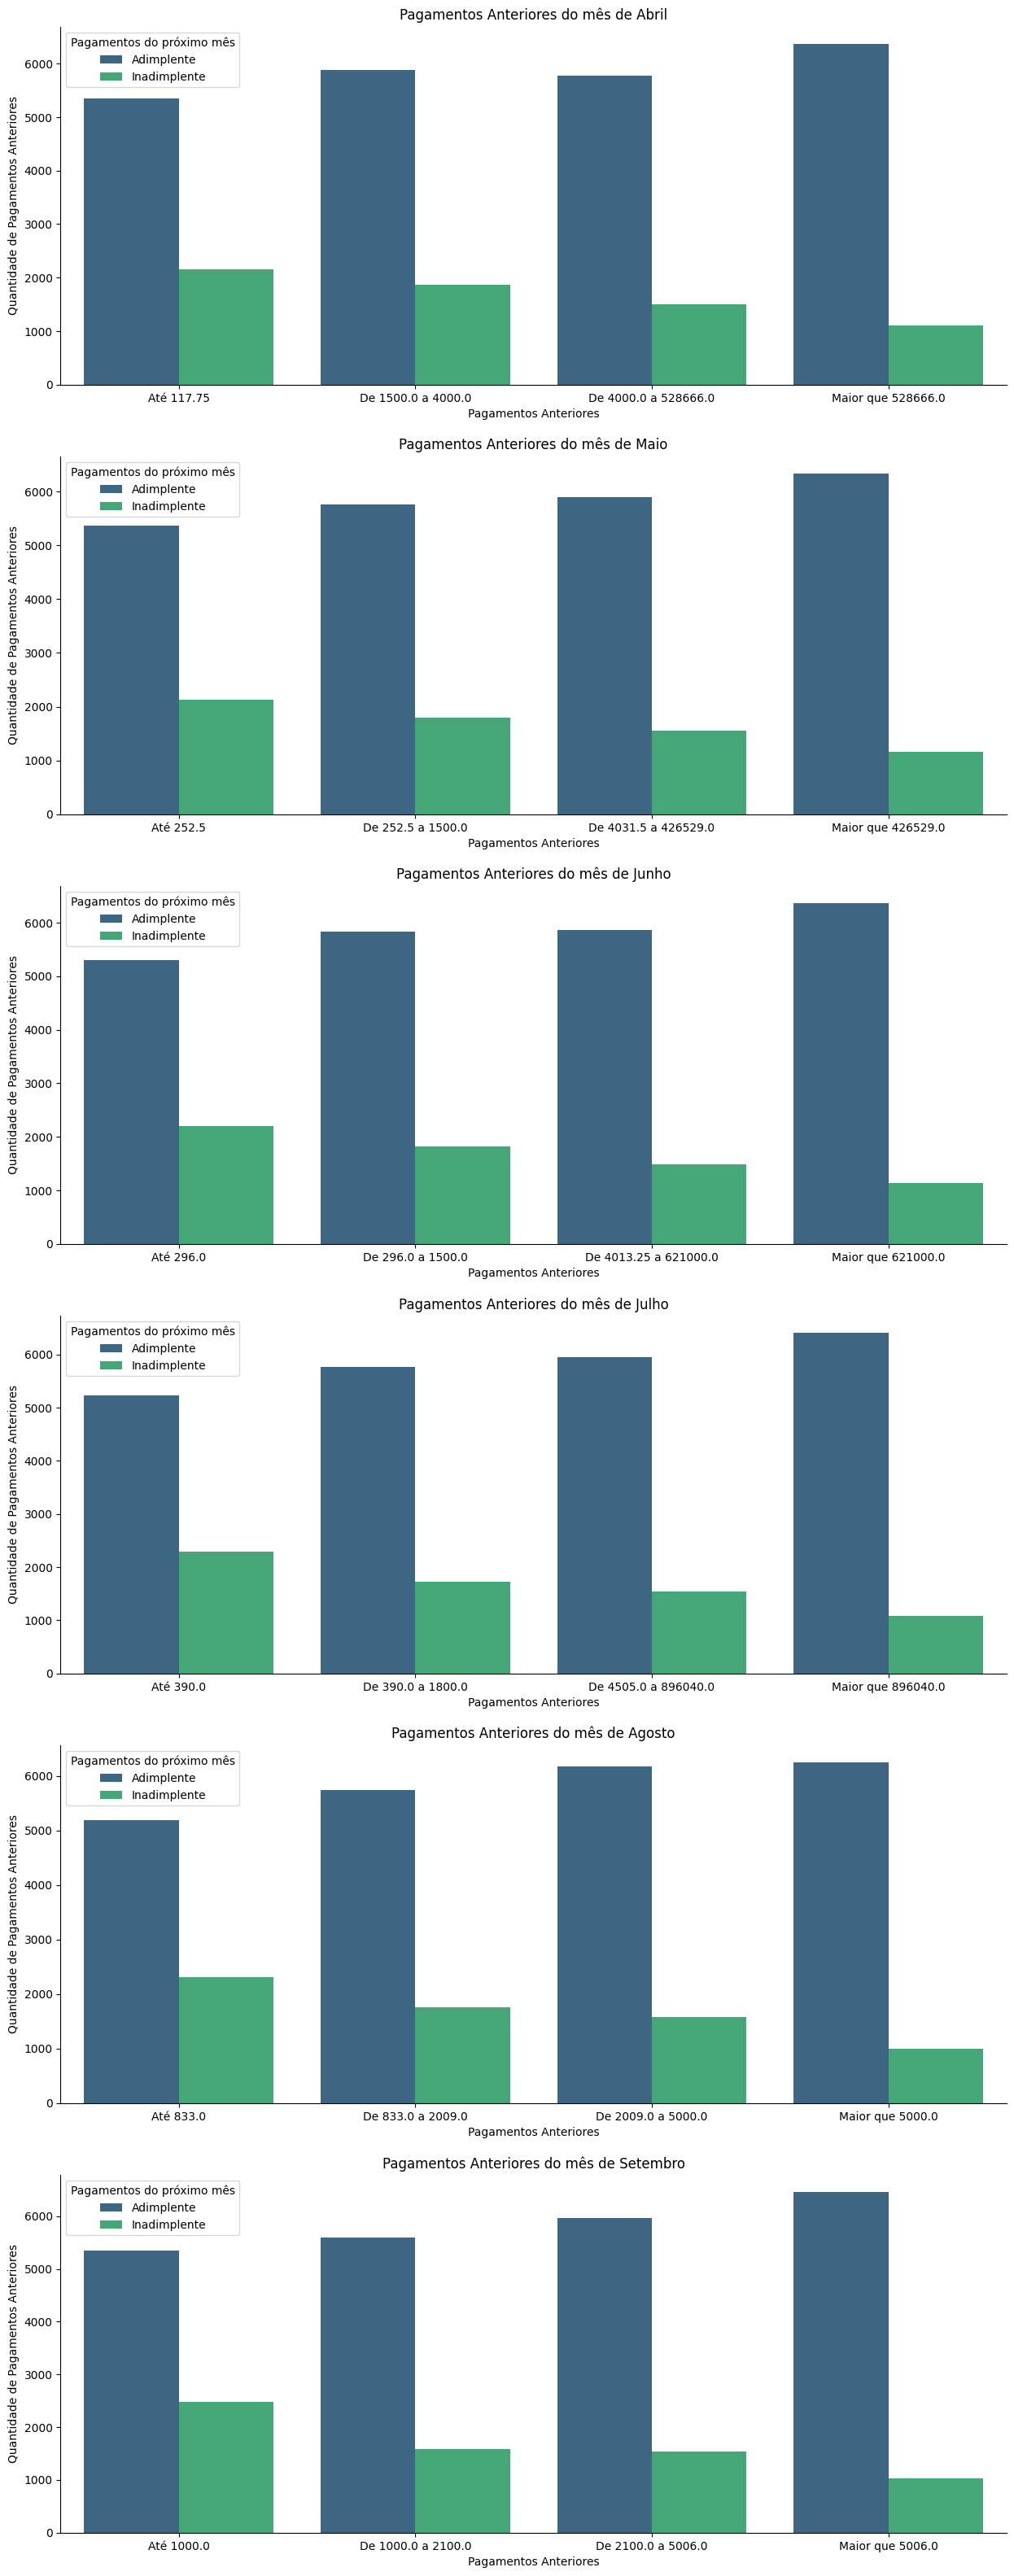

In [18]:
fig, axis = plt.subplots(6, 1, figsize = (15, 40))
fist, second, third, fourth, fifth, sixth = axis # Separando os subplots em linhas
rows = [sixth, fifth, fourth, third, second, fist] # Invertendo a ordem dos subplots
meses = ["Setembro", "Agosto", "Julho", "Junho", "Maio", "Abril"]


for x in range(len(rows)):
    aux = defaults.copy()
    aux[f"PAY_AMT{x + 1}_quantiles"] = pd.qcut(defaults[f"PAY_AMT{x + 1}"], q = 4)

    sns.countplot(data = aux, x = f"PAY_AMT{x + 1}_quantiles", hue = "default payment next month", palette = "viridis", ax = rows[x])
    rows[x].spines["top"].set_visible(False)
    rows[x].spines["right"].set_visible(False)

    rows[x].set_title("Pagamentos Anteriores do mês de " + meses[x]) # Adicionando título
    rows[x].set_xlabel("Pagamentos Anteriores") # Adicionando label no eixo x
    rows[x].set_ylabel("Quantidade de Pagamentos Anteriores") # Adicionando label no eixo y
    rows[x].legend(title = "Pagamentos do próximo mês", labels = ["Adimplente", "Inadimplente"]) # Adicionando legenda

    aux = aux[f"PAY_AMT{x + 1}_quantiles"].unique()
    axis_x = []
    for y in range(len(aux)):
        if y == 0:
            axis_x.append(f"Até {float(aux[y].right)}")

        elif y == 3:
            axis_x.append(f"Maior que {float(aux[y - 1].right)}")

        else:
            axis_x.append(f"De {float(aux[y].left)} a {float(aux[y].right)}")

    rows[x].set_xticks(list(range(4)))
    rows[x].set_xticklabels(axis_x)

plt.show()

Os gráficos acima mostram uma tendência consistente: independentemente do mês analisado, quanto maiores forem os valores dos pagamentos realizados nos meses anteriores, menor é a probabilidade de o cliente se tornar inadimplente. Observa-se que, em todas as faixas de pagamento, os clientes que realizaram pagamentos mais altos têm uma proporção significativamente menor de inadimplência, enquanto os que pagaram menos tendem a apresentar maior risco de não cumprir seus compromissos futuros. Essa informação é de extrema importancia, pois se os pagamentos anteriores auxiliam com grande vigor se o cliente pode ser ou não um mal pagador. Então isso, poderá ser usado como feature para a base de dados.


# **Aplicação da Regressão Logística**

## Preparando a base de dados

In [19]:
defaults.shape[0] / defaults[defaults["default payment next month"] == 1].shape[0]

4.520795660036167

No código acima, estamos determinando que, a cada 4 linhas, será adicionado um dado de inadimplência. Essa redistribuição dos dados é importante, pois irá melhorar a capacidade do modelo de prever tanto clientes inadimplentes quanto clientes adimplentes, equilibrando melhor a representação das classes no conjunto de dados.

In [22]:
redistributable_defaults= pd.DataFrame(columns = list(defaults.columns))

only_defaults = defaults[defaults["default payment next month"] == 1].reset_index()
only_without_defaults = defaults[defaults["default payment next month"] == 0].iloc[:only_defaults.shape[0], :].reset_index()

only_defaults.drop(columns = "index", axis = 1, inplace = True)
only_without_defaults.drop(columns = "index", axis = 1, inplace = True)

redistributable_defaults = pd.concat([redistributable_defaults, only_defaults, only_without_defaults], ignore_index=True)
redistributable_defaults

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,1,24,2,2,-1,-1,-2,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,26,-1,2,0,0,0,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,70000,2,2,30,1,2,2,0,0,2,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
3,20000,1,2,24,0,0,2,2,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
4,120000,2,1,39,-1,-1,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13267,100000,3,1,28,-2,-2,-2,-2,-2,-2,...,416,416,412,6896,416,416,416,412,1223,0
13268,50000,3,1,30,-2,-2,-2,-2,-2,-2,...,0,0,0,614,0,0,0,0,0,0
13269,270000,2,1,49,-1,-1,0,0,0,0,...,62186,62123,58995,61164,4000,5000,6000,5000,5000,0
13270,260000,1,2,38,0,-1,-1,-1,-1,0,...,3953,16466,14246,3953,3953,3953,16466,2000,5217,0


Redimencionando a Base de dados acima

## Aprendizado do modelo

In [23]:
X = defaults.drop(columns = ["MARRIAGE"] + ["default payment next month"], axis = 1) # Separando as variáveis independentes
y = defaults["default payment next month"] # Separando a variável dependente

scaler = StandardScaler() # Instanciando o StandardScaler
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns) # Normalizando os dados de treino

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42) # Dividindo a base de dados em treino e teste
y_train = y_train.astype(int)
y_test = y_test.astype(int)

Acima estamos redimencionando as features, pois o algorítimo não consegue realizar todas as interações necessárias para.

In [24]:
inadimplencia = LogisticRegression(random_state = 42, max_iter = 2000) # Instanciando o modelo de Regressão Linear
inadimplencia

LogisticRegression(max_iter=2000, random_state=42)

In [30]:
inadimplencia.fit(X_train, y_train) # Treinando o modelo

LogisticRegression(max_iter=2000, random_state=42)

In [31]:
print("Intercept (Beta 0):", inadimplencia.intercept_[0])
for columns, coeficiente in zip(X.columns, inadimplencia.coef_.tolist()[0]): print(f"{columns}: {coeficiente}")

Intercept (Beta 0): -1.456840859554212
LIMIT_BAL: -0.10202714738493962
EDUCATION: -0.0754679826270568
AGE: 0.11313401741394796
PAY_0: 0.6488561110827766
PAY_2: 0.11121244757643313
PAY_3: 0.07903338732865776
PAY_4: 0.05204135871675923
PAY_5: 0.0218893703877174
PAY_6: 0.015462019030314836
BILL_AMT1: -0.3582736502296951
BILL_AMT2: 0.12273101313452545
BILL_AMT3: 0.1148305925043932
BILL_AMT4: -0.06228894855223922
BILL_AMT5: 0.036351861088603075
BILL_AMT6: 0.030055892226645183
PAY_AMT1: -0.1665103598790414
PAY_AMT2: -0.23216197619299953
PAY_AMT3: -0.02459909140062913
PAY_AMT4: -0.05407566846589182
PAY_AMT5: -0.024626000929288707
PAY_AMT6: -0.04959844062706246


Acima, estamos adquirindo o coeficiênte de cada feature

In [33]:
new_data = pd.DataFrame({"LIMIT_BAL": random.randint(defaults["LIMIT_BAL"].min(), defaults["LIMIT_BAL"].max() + 1),
                        "EDUCATION": random.randint(defaults["EDUCATION"].min(), defaults["EDUCATION"].max() + 1),
                        "AGE": random.randint(defaults["AGE"].min(), defaults["AGE"].max() + 1),
                        "PAY_0": random.randint(defaults["PAY_0"].min(), defaults["PAY_0"].max() + 1                                      ),
                        "PAY_2": random.randint(defaults["PAY_2"].min(), defaults["PAY_2"].max() + 1),
                        "PAY_3": random.randint(defaults["PAY_3"].min(), defaults["PAY_3"].max() + 1),
                        "PAY_4": random.randint(defaults["PAY_4"].min(), defaults["PAY_4"].max() + 1),
                        "PAY_5": random.randint(defaults["PAY_5"].min(), defaults["PAY_5"].max() + 1),
                        "PAY_6": random.randint(defaults["PAY_6"].min(), defaults["PAY_6"].max() + 1),
                        "BILL_AMT1": random.randint(defaults["BILL_AMT1"].min(), defaults["BILL_AMT1"].max() + 1),
                        "BILL_AMT2": random.randint(defaults["BILL_AMT2"].min(), defaults["BILL_AMT2"].max() + 1),
                        "BILL_AMT3": random.randint(defaults["BILL_AMT3"].min(), defaults["BILL_AMT3"].max() + 1),
                        "BILL_AMT4": random.randint(defaults["BILL_AMT4"].min(), defaults["BILL_AMT4"].max() + 1),
                        "BILL_AMT5": random.randint(defaults["BILL_AMT5"].min(), defaults["BILL_AMT5"].max() + 1),
                        "BILL_AMT6": random.randint(defaults["BILL_AMT6"].min(), defaults["BILL_AMT6"].max() + 1),
                        "PAY_AMT1": random.randint(defaults["PAY_AMT1"].min(), defaults["PAY_AMT1"].max() + 1),
                        "PAY_AMT2": random.randint(defaults["PAY_AMT2"].min(), defaults["PAY_AMT2"].max() + 1),
                        "PAY_AMT3": random.randint(defaults["PAY_AMT3"].min(), defaults["PAY_AMT3"].max() + 1),
                        "PAY_AMT4": random.randint(defaults["PAY_AMT4"].min(), defaults["PAY_AMT4"].max() + 1),
                        "PAY_AMT5": random.randint(defaults["PAY_AMT5"].min(), defaults["PAY_AMT5"].max() + 1),
                        "PAY_AMT6": random.randint(defaults["PAY_6"].min(), defaults["PAY_6"].max() + 1)}, index = [0])

print("Estado: " + f'{inadimplencia.predict(pd.DataFrame(scaler.transform(new_data), columns = new_data.columns))[0]}', "\n",
      inadimplencia.predict_proba(pd.DataFrame(scaler.transform(new_data), columns = new_data.columns))[0])

Estado: 0 
 [0.97384823 0.02615177]


Acima temos uma simulação de previsão do nossa algritimo de aprendizado de máquina.

## Avaliação do Modelo

In [34]:
y_train_true = y_train
y_train_pred = inadimplencia.predict(X_train)
y_test_true = y_test
y_test_pred = inadimplencia.predict(X_test)

print(f"Acurácia de Treino: {round(accuracy_score(y_train_true, y_train_pred) * 100, 2)}%\n"+
      f"Acurácia de Teste: {round(accuracy_score(y_test_true, y_test_pred) * 100, 2)}%")

Acurácia de Treino: 81.03%
Acurácia de Teste: 81.12%


In [35]:
accuracy_val_data = roc_auc_score(y_test, y_test_pred)
print("Pontuação AUC de Regreção Logistica:", accuracy_val_data)

Pontuação AUC de Regreção Logistica: 0.6044562498953937


In [36]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.70      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



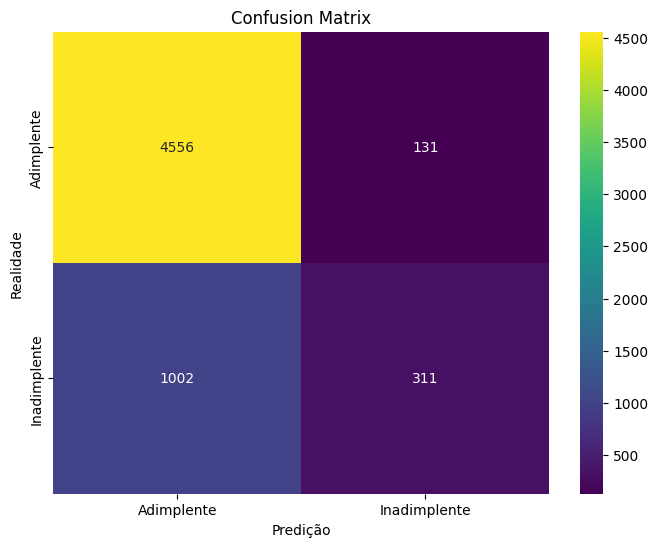

In [37]:
matrix = confusion_matrix(y_test_true, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='d', cmap='viridis', xticklabels=['Adimplente', 'Inadimplente'], yticklabels=['Adimplente', 'Inadimplente'])
plt.xlabel('Predição')
plt.ylabel('Realidade')
plt.title('Confusion Matrix')
plt.show()

###  A matriz revela que o status de pagamento tem uma forte correlação negativa com a inadimplência, indicando que melhorias no pagamento podem reduzir o risco.
